# Name : Diksha Pardeshi
## USC ID : 7961073499
## GitHub username : dikshapardeshi

# Loading the data

In [1]:
!pip install scipy
from scipy.io import arff
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import mahalanobis
from sklearn.covariance import EmpiricalCovariance

In [2]:
#loading the arff file 

data, meta = arff.loadarff("../data/column_2C_weka.arff")

In [3]:
##converting the arff file into a pandas dataframe 
data_2C = pd.DataFrame(data)


In [4]:
data_2C

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,b'Abnormal'
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,b'Abnormal'
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,b'Abnormal'
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,b'Abnormal'
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,b'Abnormal'
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,b'Normal'
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,b'Normal'
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,b'Normal'
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,b'Normal'


In [5]:
data_2C.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [6]:
## since I am getting the class in the form of b'Normal this means that the dataframe is reading the class colummn as byte strings
## rather than regular string so we'll convert these byte strings to regular strings 


In [7]:

data_2C['class'] = data_2C['class'].str.decode('utf-8')

In [8]:
data_2C

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


In [9]:
data_2C.loc[data_2C['class']=='Abnormal']

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
...,...,...,...,...,...,...,...
205,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,Abnormal
206,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,Abnormal
207,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,Abnormal
208,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,Abnormal


In [10]:
data_2C.loc[data_2C['class']=='Normal']

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
210,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
211,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
212,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
213,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
214,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


In [11]:

data_2C.loc[data_2C['class'] == 'Abnormal', 'target_value'] = 1
data_2C.loc[data_2C['class'] == 'Normal', 'target_value'] = 0


In [12]:
data_2C

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class,target_value
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal,1.0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal,1.0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal,1.0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal,1.0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal,1.0
...,...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal,0.0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal,0.0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal,0.0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal,0.0


In [13]:
data_2C.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
 7   target_value              310 non-null    float64
dtypes: float64(7), object(1)
memory usage: 19.5+ KB


In [14]:
data_2C.target_value = data_2C.target_value.astype('int64') 

In [15]:
data_2C

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class,target_value
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal,1
...,...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal,0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal,0


In [16]:
data_2C.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
 7   target_value              310 non-null    int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 19.5+ KB


In [17]:
data_2C[data_2C['target_value']==0]

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class,target_value
210,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal,0
211,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal,0
212,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal,0
213,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal,0
214,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal,0
...,...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal,0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal,0


In [18]:
data_2C[data_2C['target_value']==1]

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class,target_value
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal,1
...,...,...,...,...,...,...,...,...
205,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,Abnormal,1
206,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,Abnormal,1
207,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,Abnormal,1
208,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,Abnormal,1


In [19]:
data_2C.drop('class',axis=1)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,target_value
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0


# Pre-Processing and Exploratory data analysis:

# Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1.
# Here 0 is normal and 1 is abnormal


In [20]:
color = {1:"red",0:"blue"}

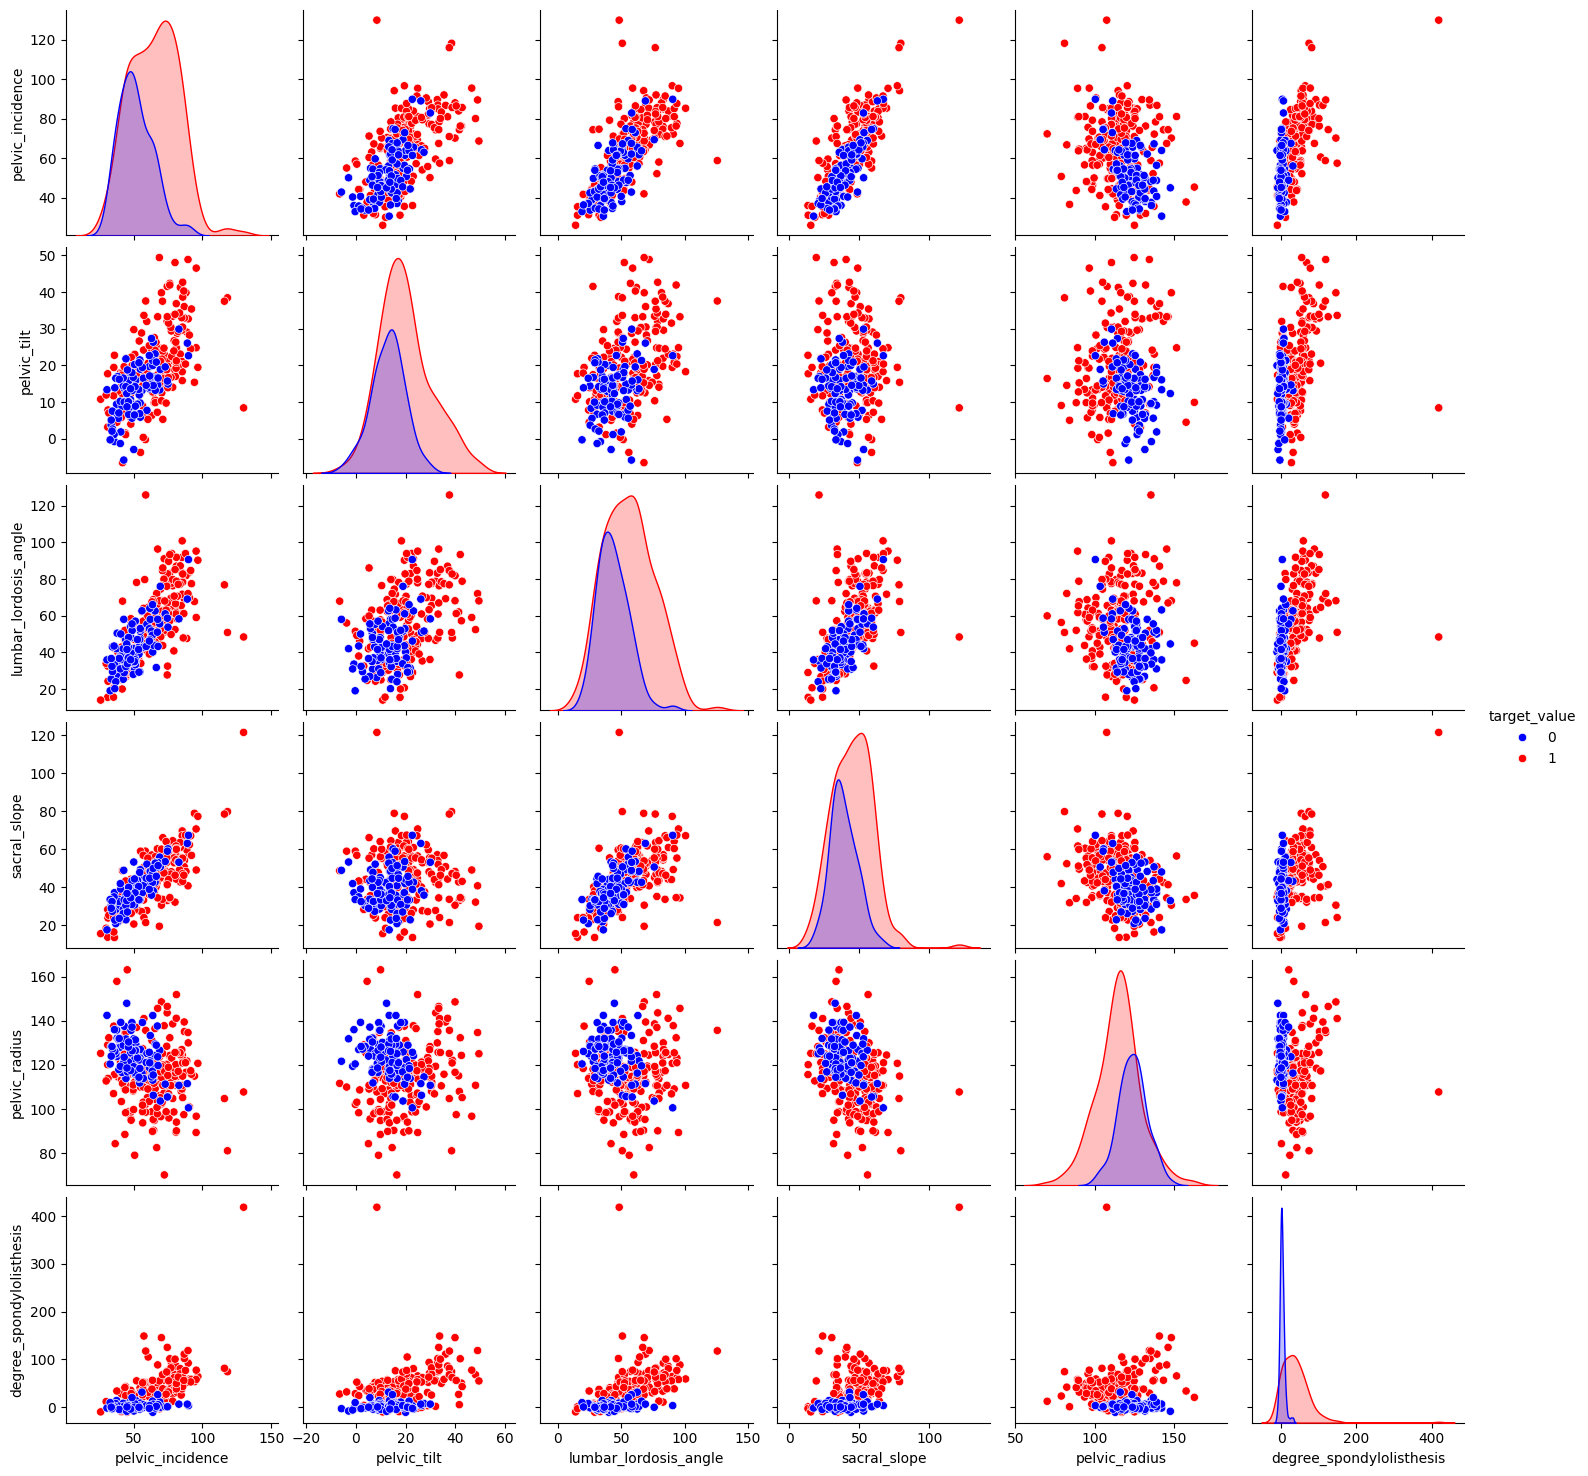

In [21]:
sns.pairplot(data_2C,hue='target_value',palette=color)
plt.show()

# Make boxplots for each of the independent variables. Use color to show Classes 0 and 1

<Axes: title={'center': 'Box plot of pelvic incidence'}, xlabel='target_value', ylabel='pelvic_incidence'>

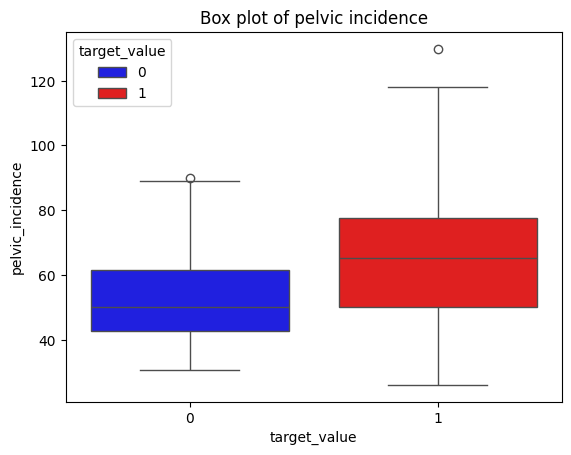

In [22]:
plt.title('Box plot of pelvic incidence')
sns.boxplot(x='target_value', y='pelvic_incidence', data=data_2C, hue='target_value', palette=color)

<Axes: title={'center': 'Box plot of pelvic tilt'}, xlabel='target_value', ylabel='pelvic_tilt'>

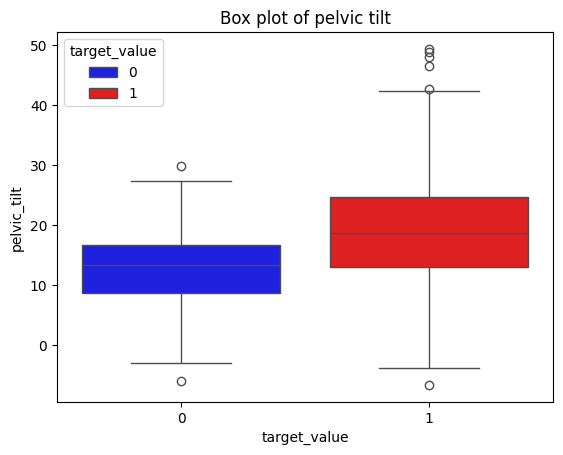

In [23]:
plt.title('Box plot of pelvic tilt')
sns.boxplot(x='target_value', y='pelvic_tilt', data=data_2C, hue='target_value', palette=color)

<Axes: title={'center': 'Box plot of lumbar_lordosis_angle'}, xlabel='target_value', ylabel='lumbar_lordosis_angle'>

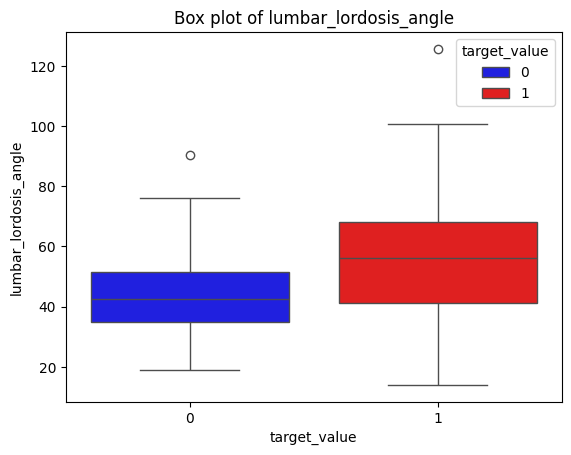

In [24]:
plt.title('Box plot of lumbar_lordosis_angle')
sns.boxplot(x='target_value', y='lumbar_lordosis_angle', data=data_2C, hue='target_value', palette=color)

<Axes: title={'center': 'Box plot of sacral_slope'}, xlabel='target_value', ylabel='sacral_slope'>

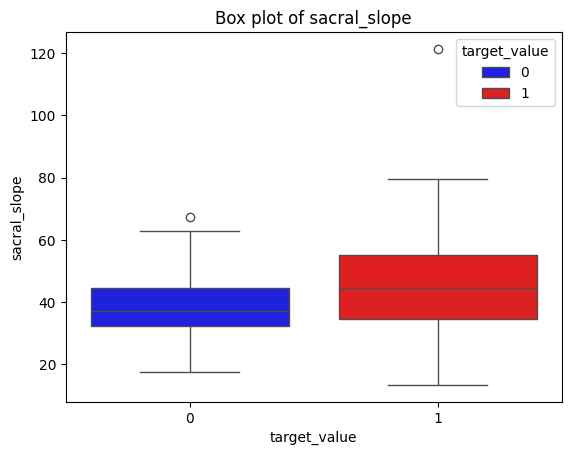

In [25]:
plt.title('Box plot of sacral_slope')
sns.boxplot(x='target_value', y='sacral_slope', data=data_2C, hue='target_value', palette=color)

<Axes: title={'center': 'Box plot of pelvic_radius'}, xlabel='target_value', ylabel='pelvic_radius'>

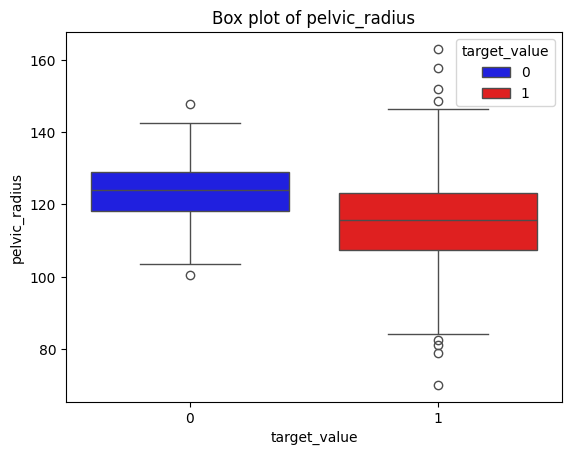

In [26]:
plt.title('Box plot of pelvic_radius')
sns.boxplot(x='target_value', y='pelvic_radius', data=data_2C, hue='target_value', palette=color)

<Axes: title={'center': 'Box plot of degree_spondylolisthesis'}, xlabel='target_value', ylabel='degree_spondylolisthesis'>

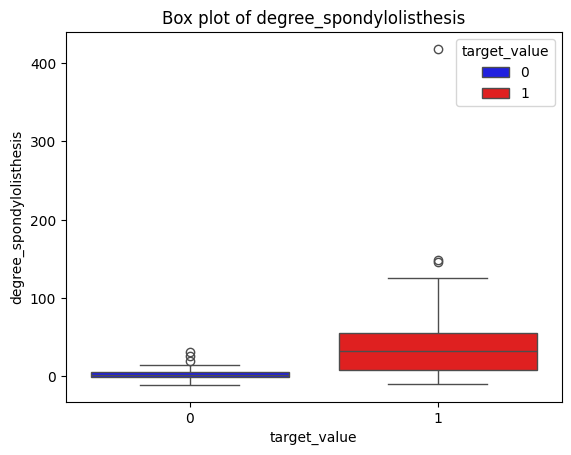

In [27]:
plt.title('Box plot of degree_spondylolisthesis')
sns.boxplot(x='target_value', y='degree_spondylolisthesis', data=data_2C, hue='target_value', palette=color)

# Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.

# Here Class 0 corresponds to Normal class and Class 1 corresponds to Abnormal class

In [28]:
data_2C

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class,target_value
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal,1
...,...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal,0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal,0


In [29]:
data_2C = data_2C.drop('class',axis=1)

In [30]:
data_2C

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,target_value
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0


In [31]:
train_set_0 = data_2C.loc[data_2C['target_value']==0] [:70]

In [32]:
train_set_0

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,target_value
210,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,0
211,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,0
212,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,0
213,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,0
214,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,0
...,...,...,...,...,...,...,...
275,67.289712,16.717514,51.000000,50.572198,137.591778,4.960344,0
276,51.325464,13.631223,33.258578,37.694240,131.306122,1.788870,0
277,65.756348,13.206926,44.000000,52.549422,129.393573,-1.982120,0
278,40.413366,-1.329412,30.982768,41.742778,119.335655,-6.173675,0


In [33]:
train_set_1 = data_2C.loc[data_2C['target_value']==1] [:140]

In [34]:
train_set_1

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,target_value
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1
...,...,...,...,...,...,...,...
135,77.121344,30.349874,77.481083,46.771470,110.611148,82.093607,1
136,88.024499,39.844669,81.774473,48.179830,116.601538,56.766083,1
137,83.396606,34.310989,78.423293,49.085617,110.466516,49.672096,1
138,72.054034,24.700737,79.874016,47.353297,107.172358,56.426159,1


In [35]:
train_data = pd.concat([train_set_0,train_set_1])

In [36]:
train_data

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,target_value
210,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,0
211,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,0
212,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,0
213,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,0
214,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,0
...,...,...,...,...,...,...,...
135,77.121344,30.349874,77.481083,46.771470,110.611148,82.093607,1
136,88.024499,39.844669,81.774473,48.179830,116.601538,56.766083,1
137,83.396606,34.310989,78.423293,49.085617,110.466516,49.672096,1
138,72.054034,24.700737,79.874016,47.353297,107.172358,56.426159,1


In [37]:
test_set_0 = data_2C.loc[data_2C['target_value']==0] [70:]

In [38]:
test_set_1 = data_2C.loc[data_2C['target_value']==1] [140:]

In [39]:
test_set_0


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,target_value
280,50.086153,13.430044,34.457541,36.656108,119.134622,3.089484,0
281,64.261507,14.497866,43.902504,49.763642,115.388268,5.951454,0
282,53.683380,13.447022,41.584297,40.236358,113.913703,2.737035,0
283,48.995958,13.113820,51.873520,35.882137,126.398188,0.535472,0
284,59.167612,14.562749,43.199158,44.604863,121.035642,2.830504,0
285,67.804694,16.550662,43.256802,51.254033,119.685645,4.867540,0
286,61.734875,17.114312,46.900000,44.620563,120.920200,3.087726,0
287,33.041688,-0.324678,19.071075,33.366366,120.388611,9.354365,0
288,74.565015,15.724320,58.618582,58.840695,105.417304,0.599247,0
289,44.430701,14.174264,32.243495,30.256437,131.717613,-3.604255,0


In [40]:
test_set_1

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,target_value
140,69.563486,15.401139,74.438497,54.162347,105.067356,29.701211,1
141,89.504947,48.903653,72.003423,40.601295,134.634291,118.353370,1
142,85.290173,18.278890,100.744220,67.011283,110.660701,58.884948,1
143,60.626217,20.595958,64.535262,40.030259,117.225554,104.859247,1
144,60.044177,14.309656,58.038865,45.734521,105.131664,30.409133,1
...,...,...,...,...,...,...,...
205,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,1
206,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,1
207,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,1
208,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,1


In [41]:
test_data = pd.concat([test_set_0,test_set_1])

In [42]:
test_data

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,target_value
280,50.086153,13.430044,34.457541,36.656108,119.134622,3.089484,0
281,64.261507,14.497866,43.902504,49.763642,115.388268,5.951454,0
282,53.683380,13.447022,41.584297,40.236358,113.913703,2.737035,0
283,48.995958,13.113820,51.873520,35.882137,126.398188,0.535472,0
284,59.167612,14.562749,43.199158,44.604863,121.035642,2.830504,0
...,...,...,...,...,...,...,...
205,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,1
206,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,1
207,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,1
208,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,1


In [43]:

train_data


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,target_value
210,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,0
211,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,0
212,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,0
213,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,0
214,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,0
...,...,...,...,...,...,...,...
135,77.121344,30.349874,77.481083,46.771470,110.611148,82.093607,1
136,88.024499,39.844669,81.774473,48.179830,116.601538,56.766083,1
137,83.396606,34.310989,78.423293,49.085617,110.466516,49.672096,1
138,72.054034,24.700737,79.874016,47.353297,107.172358,56.426159,1


In [44]:
test_data.shape

(100, 7)

# Write code for k-nearest neighbors with Euclidean metric (or use a software package).

In [45]:
# selects all the rows and columns except for the last one in train data
X_train = train_data.iloc[:,:-1]
# selects only the last column from the train data
y_train = train_data.iloc[:,-1]
# selects all the rows and columns except for the last one in test data
X_test = test_data.iloc[:,:-1]
# selects only the last column from the test data
y_test = test_data.iloc[:,-1]

In [46]:
X_train

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
210,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683
211,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642
212,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195
213,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941
214,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910
...,...,...,...,...,...,...
135,77.121344,30.349874,77.481083,46.771470,110.611148,82.093607
136,88.024499,39.844669,81.774473,48.179830,116.601538,56.766083
137,83.396606,34.310989,78.423293,49.085617,110.466516,49.672096
138,72.054034,24.700737,79.874016,47.353297,107.172358,56.426159


In [47]:
y_train

210    0
211    0
212    0
213    0
214    0
      ..
135    1
136    1
137    1
138    1
139    1
Name: target_value, Length: 210, dtype: int64

In [48]:
X_test

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
280,50.086153,13.430044,34.457541,36.656108,119.134622,3.089484
281,64.261507,14.497866,43.902504,49.763642,115.388268,5.951454
282,53.683380,13.447022,41.584297,40.236358,113.913703,2.737035
283,48.995958,13.113820,51.873520,35.882137,126.398188,0.535472
284,59.167612,14.562749,43.199158,44.604863,121.035642,2.830504
...,...,...,...,...,...,...
205,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107
206,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072
207,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216
208,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629


In [49]:
y_test

280    0
281    0
282    0
283    0
284    0
      ..
205    1
206    1
207    1
208    1
209    1
Name: target_value, Length: 100, dtype: int64

# i. Euclidean metric

In [50]:
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X_train, y_train)

y_test_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy for k-nearest neighbors with Euclidean metric:", accuracy)

Accuracy for k-nearest neighbors with Euclidean metric: 0.92


     Train Error Rate  Test Error Rate
k                                     
208          0.333333             0.30
205          0.333333             0.30
202          0.333333             0.30
199          0.333333             0.30
196          0.333333             0.30
..                ...              ...
13           0.142857             0.12
10           0.133333             0.10
7            0.142857             0.12
4            0.142857             0.06
1            0.000000             0.13

[70 rows x 2 columns]


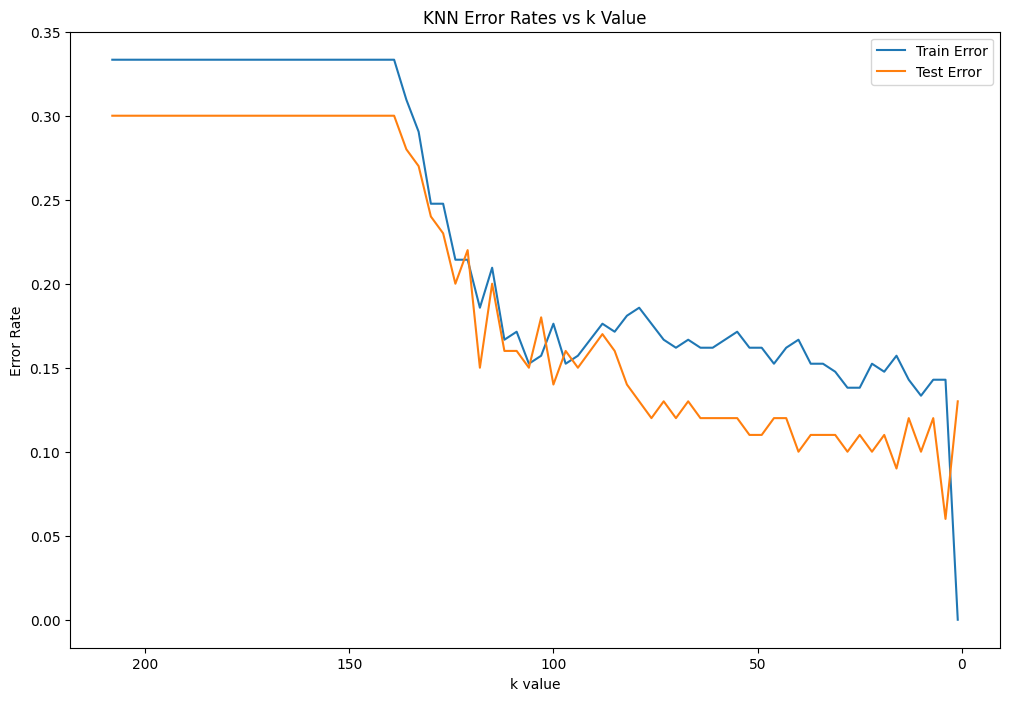

In [51]:

k_value_range = range(208, 0, -3) # the range of k values we'll use and the increments after which the value will be changed

#we'll store the results from all the models with different k values here
results = []

# Looping through different k values
for k in k_value_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)
    train_error = 1 - accuracy_score(y_train, y_train_pred)
    test_error = 1 - accuracy_score(y_test, y_test_pred)
    
    ## adding the results to the results list
    results.append({
        'k': k,
        'Train Error Rate': train_error,
        'Test Error Rate': test_error
    })
## storing all the error rates in a dataframe
results_df = pd.DataFrame(results)
results_df.set_index('k', inplace=True)

## Chatgpt prompt : "How can I change the x-axis in a matplotlib plot so that it starts from the first numeric value for my X in my dataset using pandas "

## Chatgpt prompt : "How to invert an axis in matplotlib?"

print(results_df)
plt.figure(figsize=(12, 8))
plt.plot(results_df.index, results_df['Train Error Rate'], label='Train Error')
plt.plot(results_df.index, results_df['Test Error Rate'], label='Test Error')
plt.xlabel('k value')
plt.ylabel('Error Rate')
plt.title('KNN Error Rates vs k Value')
plt.legend()
plt.gca().invert_xaxis() 
plt.show()



# Finding the optimal value of k

In [52]:
optimal_k = results_df['Test Error Rate'].idxmin()
min_test_error = results_df['Test Error Rate'].min()
print(f"The optimal k value (k*) is: {optimal_k}")
print(f"Corresponding test error rate: {min_test_error:.2f}")

The optimal k value (k*) is: 4
Corresponding test error rate: 0.06


# iii Learning curve

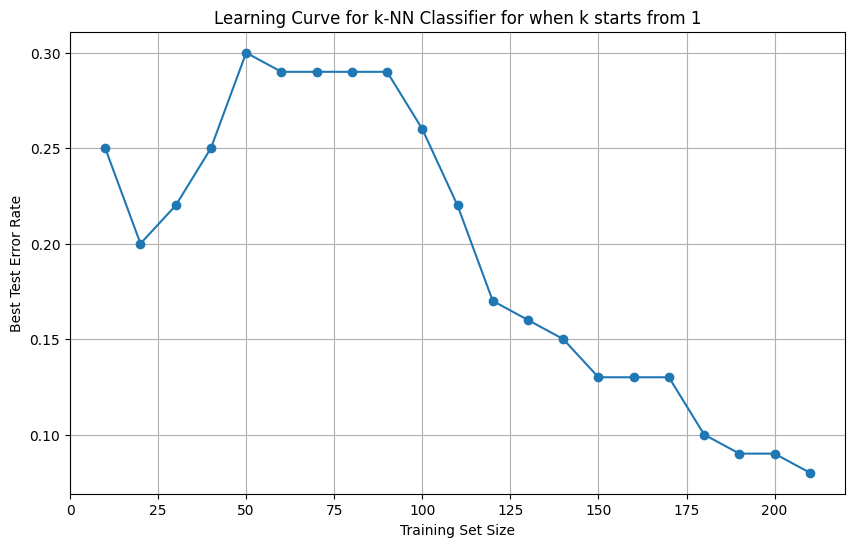

In [53]:

train_sizes = np.arange(10, 211, 10)
k_values = np.arange(1, 201, 5)

#Creating an empty list to store the best error rates for each value of k 
best_error_rates = []

# GPT prompt : "how do I split a dataset such that for each N, select your training set by choosing the first 
# N/3 rows of Class 0 and and the first N − N/3 rows of Class 1 from the same training set. This has to be done multiple times so give a loop"

for N in train_sizes:
    idx_class_0 = train_data[train_data['target_value'] == 0].index[:N//3]
    idx_class_1 = train_data[train_data['target_value'] == 1].index[:N - N//3]
    splitted_set = np.concatenate([idx_class_0, idx_class_1])
    
    train_df = train_data.loc[splitted_set]
    x_train = train_df.drop(columns='target_value')
    y_train = train_df['target_value']

## GPT prompt : "What should I keep as a defualt value such that the model can compare and track the error scores against this default value?"
    best_error_rate = float('inf')


    # Loop over different k values
    for k in k_values:
        if k>len(x_train):   ## gpt prompt : Why am I getting this error : "ValueError: Expected n_neighbors <= n_samples_fit, but n_neighbors = 11, n_samples_fit = 10, n_samples = 100"
            continue
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(x_train, y_train)
        y_test_pred = knn.predict(X_test)
        error_rate = 1 - accuracy_score(y_test, y_test_pred)
        
    ## comparing the most recent error rate against the current best error rate
        if error_rate < best_error_rate:
            best_error_rate = error_rate


    # Storing the best error rate for the current k-neighbor model
    best_error_rates.append(best_error_rate)
    

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, best_error_rates, marker='o')
plt.xlabel('Training Set Size')
plt.ylabel('Best Test Error Rate')
plt.title('Learning Curve for k-NN Classifier for when k starts from 1')
plt.grid(True)
plt.show()


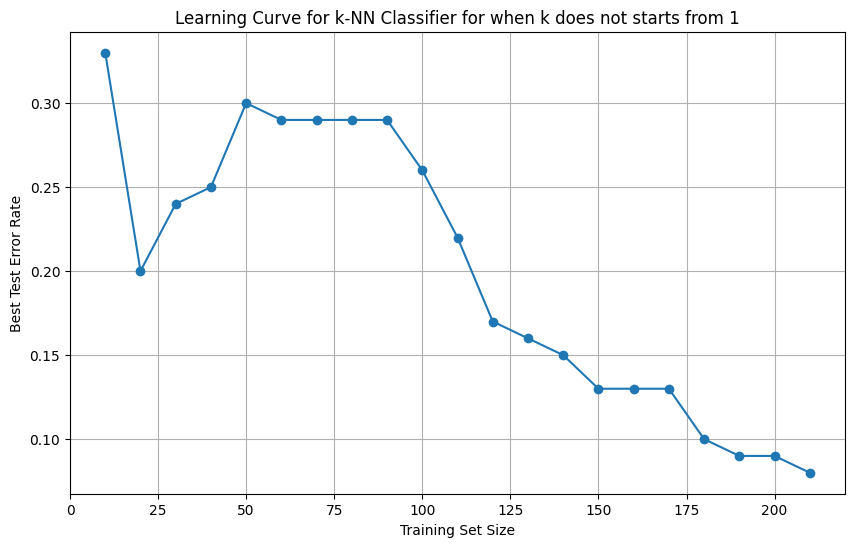

In [54]:
## All the refs same as above


train_sizes = np.arange(10, 211, 10)
k_values = np.arange(6, 201, 5)

best_error_rates = []

for N in train_sizes:
    idx_class_0 = train_data[train_data['target_value'] == 0].index[:N//3]
    idx_class_1 = train_data[train_data['target_value'] == 1].index[:N - N//3]
    subset_idx = np.concatenate([idx_class_0, idx_class_1])
    
    
    train_df = train_data.loc[subset_idx]
    x_train = train_df.drop(columns='target_value')
    y_train = train_df['target_value']

    best_error_rate = float('inf')
    
    for k in k_values:
        if k>len(x_train):
            continue
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(x_train, y_train)
        y_test_pred = knn.predict(X_test)
        error_rate = 1 - accuracy_score(y_test, y_test_pred)

        ## comparing the most recent error rate against the current best error rate
        if error_rate < best_error_rate:
            best_error_rate = error_rate

    
    best_error_rates.append(best_error_rate)
    

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, best_error_rates, marker='o')
plt.xlabel('Training Set Size')
plt.ylabel('Best Test Error Rate')
plt.title('Learning Curve for k-NN Classifier for when k does not starts from 1')
plt.grid(True)
plt.show()


## Euclidean Distance

In [55]:


k_values = list(range(1, 200, 5))

test_errors = []


In [56]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error_rate = 1 - accuracy_score(y_test, y_pred)
    test_errors.append({'k': k, 'metric': 'Euclidean', 'test_error': error_rate})


# Replace the Euclidean metric

## with Minkowski Distance

## Manhattan Distance (p=1)


In [57]:
## pfloat, default=2 : Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used. This parameter is expected to be positive.
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=1)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error_rate = 1 - accuracy_score(y_test, y_pred)
    test_errors.append({'k': k, 'metric': 'Manhattan (p=1)', 'test_error': error_rate})


## Minkowski distance with log10(p) ∈ {0.1, 0.2, ..., 1}

In [58]:
## gpt : how to calculate KNN for log10(p) with Minkowski metric where log10(p) ∈ {0.1, 0.2, 0.3, . . . , 1}
log10_p_values = np.arange(0.1, 1.1, 0.1)
for log10_p in log10_p_values:
    p = 10 ** log10_p
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=p)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        error_rate = 1 - accuracy_score(y_test, y_pred)
        test_errors.append({'k': k, 'metric': f'Minkowski (log10(p)={log10_p})', 'test_error': error_rate})


## Chebyshev Distance

In [59]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='chebyshev')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error_rate = 1 - accuracy_score(y_test, y_pred)
    test_errors.append({'k': k, 'metric': 'Chebyshev (p → infinty)', 'test_error': error_rate})


## Mahalanobis 

In [60]:
## gpt : how to calculate KNN for the metric : mahalanobis"

cov_matrix = EmpiricalCovariance().fit(X_train).precision_

def mahalanobis_metric(x, y):
    return mahalanobis(x, y, cov_matrix)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric=mahalanobis_metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error_rate = 1 - accuracy_score(y_test, y_pred)
    test_errors.append({'k': k, 'metric': 'Mahalanobis', 'test_error': error_rate})


In [61]:
df_errors = pd.DataFrame(test_errors)

# gpt : given a dataframe how do I get the smallest value from a specific column such that it matches a specific criteria called metric. I want the smallest value for a column corresponding to another column whihch has multiple caltegories/entries

best_manhattan = df_errors[df_errors['metric'] == 'Manhattan (p=1)'].nsmallest(1, 'test_error')
best_log10p = df_errors[df_errors['metric'].str.contains('Minkowski')].nsmallest(1, 'test_error')
best_chebyshev = df_errors[df_errors['metric'] == 'Chebyshev (p → infinty)'].nsmallest(1, 'test_error')
best_euclidean = df_errors[df_errors['metric'] == 'Euclidean'].nsmallest(1, 'test_error')
best_mahalanobis = df_errors[df_errors['metric'] == 'Mahalanobis'].nsmallest(1, 'test_error')


best_results = pd.DataFrame({
    'Metric': ['Manhattan (p=1)', 'Minkowski (best log10(p))', 'Chebyshev (p → infinity)', 'Euclidean', 'Mahalanobis'],
    'Best k': [best_manhattan['k'].values[0], best_log10p['k'].values[0], best_chebyshev['k'].values[0], best_euclidean['k'].values[0], best_mahalanobis['k'].values[0]],
    'Test Error': [best_manhattan['test_error'].values[0], best_log10p['test_error'].values[0], best_chebyshev['test_error'].values[0], best_euclidean['test_error'].values[0], best_mahalanobis['test_error'].values[0]]
})

best_results_sorted = best_results.sort_values(by='Test Error').reset_index(drop=True)
print("The majority polling decision : ")
print()
print(best_results_sorted)


The majority polling decision : 

                      Metric  Best k  Test Error
0  Minkowski (best log10(p))       6        0.06
1   Chebyshev (p → infinity)      16        0.08
2                  Euclidean       6        0.08
3            Manhattan (p=1)       1        0.11
4                Mahalanobis       1        0.15


## Weighted decision

In [62]:
metrics = ['euclidean', 'manhattan', 'chebyshev']
k_values = list(range(1, 197, 5)) 

test_errors = []

for metric in metrics:
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric, weights='distance')
        
        knn.fit(X_train, y_train)
        
        y_test_pred = knn.predict(X_test)
        
        error = 1 - accuracy_score(y_test, y_test_pred)
        
        test_errors.append({'metric': metric, 'k': k, 'test_error': error})

df_errors = pd.DataFrame(test_errors)

best_euclidean = df_errors[df_errors['metric'] == 'euclidean'].nsmallest(1, 'test_error')
best_manhattan = df_errors[df_errors['metric'] == 'manhattan'].nsmallest(1, 'test_error')
best_chebyshev = df_errors[df_errors['metric'] == 'chebyshev'].nsmallest(1, 'test_error')

best_results = pd.DataFrame({
    'Metric': ['Euclidean', 'Manhattan', 'Chebyshev'],
    'Best k': [best_euclidean['k'].values[0], best_manhattan['k'].values[0], best_chebyshev['k'].values[0]],
    'Test Error': [best_euclidean['test_error'].values[0], best_manhattan['test_error'].values[0], best_chebyshev['test_error'].values[0]]
})

best_results_sorted = best_results.sort_values(by='Test Error').reset_index(drop=True)

print(best_results_sorted)

      Metric  Best k  Test Error
0  Euclidean       6        0.10
1  Manhattan      26        0.10
2  Chebyshev      16        0.11


## Lowest training error rate

# The lowest training error rate in this entire homework with and without k = 1 is 0.0

# References : 

https://www.geeksforgeeks.org/python-strings-decode-method/

https://www.w3schools.com/python/pandas/pandas__dataframe.asp

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

https://seaborn.pydata.org/generated/seaborn.boxplot.html

https://eeob-biodata.github.io/BCB546X-python/04-more-dataframes/

https://www.geeksforgeeks.org/k-nearest-neighbors-with-python-ml/

https://www.geeksforgeeks.org/k-nearest-neighbors-with-python-ml/

https://www.kdnuggets.com/2020/11/most-popular-distance-metrics-knn.html

https://scikitlearn.org/stable/modules/generated/sklearn.metrics.pairwise.distance_metrics.html#sklearn.metrics.pairwise.distance_metrics

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

https://pandas.pydata.org/docs/erence/api/pandas.DataFrame.set_index.html

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

https://pandas.pydata.org/docs/erence/api/pandas.DataFrame.plot.line.html

https://www.geeksforgeeks.org/how-to-get-the-minimum-value-from-the-pandas-dataframe-in-python/

https://www.geeksforgeeks.org/get-the-index-of-minimum-value-in-dataframe-column/

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nsmallest.html